# Data-Driven Modeling of Concentric Tube Continuum Robot (CTCR)

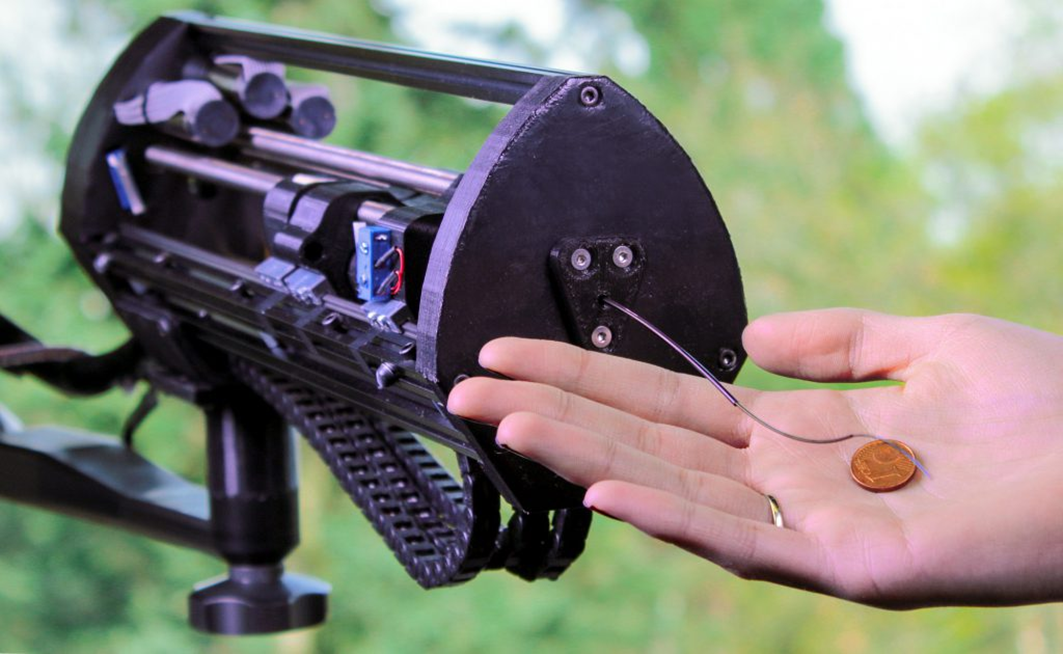

Continuum Robots are type of robot which are characterized by its absence of rigid-links and joint and continuous appearance. Among types of Continuum Robots, Concentric Tube refers to the mechanism which utilizes curved multi-tube catheter structures. There are difficulties to model Concentric Tube Continuum Robot using traditional physical based approach due to its non-linearity behaviour of elastic interactions between the flexible tubes. Data-driven approach can be utilized to be an alternative method, thus a smaller error motion could be achieved.

## Table of Contents
1. [Data Overview](##1.-Data-Overview)
2. [Data Preprocessing](##2.-Data-Preprocessing)
    - 2.1. [Data Cleaning](##2.1.-Data-Cleaning)
    - 2.2. [Exploratory Data Analysis](##2.2.-Exploratory-Data-Analysis)
    - 2.3. [Train-Test Split](##2.3.-Train-Test-Split)
3. [Regressions](##3.-Regressions)
    - 3.1. [Linear Regression](##3.1.-Linear-Regression)
    - 3.2. [Random Forest Regression](##3.2.-Random-Forest-Regression)
    - 3.3. [ExtraTrees Regression](##3.3.-ExtraTrees-Regression) 


 

## 1. Data Overview

Before getting further, in this section, the general overview of the data will be provided. First, the dataset will be imported to this notebook. Then, the overview of the dataset will be shown.


In [2]:
import pandas as pd

df = pd.read_csv('dataset/CRL-Dataset-CTCR-Pose.csv', header=None)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  float64
 1   1       100000 non-null  float64
 2   2       100000 non-null  float64
 3   3       100000 non-null  float64
 4   4       100000 non-null  float64
 5   5       100000 non-null  float64
 6   6       100000 non-null  float64
 7   7       100000 non-null  float64
 8   8       100000 non-null  float64
 9   9       100000 non-null  float64
 10  10      100000 non-null  float64
 11  11      100000 non-null  float64
 12  12      100000 non-null  float64
 13  13      100000 non-null  float64
 14  14      100000 non-null  float64
 15  15      100000 non-null  float64
 16  16      100000 non-null  float64
 17  17      100000 non-null  float64
 18  18      100000 non-null  float64
 19  19      100000 non-null  float64
 20  20      100000 non-null  float64
 21  21      100

0           1         2          3         4          5   \
0     -1.038446   -8.648766 -0.934423  -4.659318 -0.518523  -3.419294   
1     -0.849078  -12.935190 -0.948167  -4.141172 -0.835220  -1.755485   
2     -1.017749  -12.567895 -0.812003 -12.013610 -0.812547  -8.885584   
3     -0.549890  -12.088090 -0.942784 -10.099092 -0.983485  -6.809770   
4     -0.983188  -22.793282 -0.975256  -3.773322 -0.944051  -1.200367   
...         ...         ...       ...        ...       ...        ...   
99995  1.013616 -115.908578  0.129843 -86.372926  0.793488 -47.812503   
99996  0.991986 -116.383328  0.789818 -88.284428  0.139324 -44.712237   
99997  0.987575 -113.233227  0.737640 -82.726911  0.921319 -42.586561   
99998  0.881862 -117.309543  0.918263 -85.435163  0.594123 -48.462650   
99999  0.618577 -123.498620  0.502818 -94.074584  0.843519 -49.858772   

             6          7         8         9   ...        30        31  \
0     -1.038446  -8.648766 -0.934423 -4.659318  ...  0.086870 -0.409851   
1      0.189368  -4.286425 -0.013744  0.518146  ...  0.122501 -0.453856   
2     -0.168671   0.367295  0.136164 -7.872439  ...  0.095631 -0.442791   
3      0.467859   0.479805 -0.130781  1.914518  ...  0.136366 -0.478341   
4     -0.433298 -10.705192 -0.032472  6.325771  ...  0.155923 -0.473531   
...         ...        ...       ...       ...  ...       ...       ...   
99995  0.660221   3.220634  0.054423  4.742424  ... -0.465600 -0.127947   
99996 -0.021630  -0.474749  0.659975 -1.911502  ... -0.425068 -0.162333   
99997 -0.004412   3.150100 -0.052177  5.557516  ... -0.522901 -0.001744   
99998 -0.105713  -4.076316  0.180623 -2.708252  ... -0.482495 -0.034416   
99999 -0.263285  -6.189077 -0.415445 -8.639421  ... -0.519509 -0.081435   

             32         33         34          35        36        37  \
0      0.548841 -51.311665 -52.394960 -196.172089  0.651852  0.402930   
1      0.544632 -50.692317 -60.809199 -208.382272  0.598864  0.371977   
2      0.565367 -45.198441 -62.608553 -201.395251  0.611581  0.389910   
3      0.542060 -47.439516 -65.997012 -207.153421  0.527576  0.289144   
4      0.541701 -51.306577 -58.613165 -219.831348  0.616890  0.331818   
...         ...        ...        ...         ...       ...       ...   
99995  0.686238  11.500513  28.227900 -245.757880  0.634882 -0.383059   
99996  0.736364  10.706496  17.988644 -240.644806  0.604545 -0.346952   
99997  0.723779   9.452766  35.094901 -250.906354  0.580659 -0.459221   
99998  0.741441  12.219248  28.893432 -247.017541  0.576371 -0.444613   
99999  0.714351  16.364599  27.650480 -251.611725  0.616123 -0.426460   

             38        39  
0     -0.085287  0.636759  
1     -0.123544  0.698378  
2     -0.085298  0.683128  
3     -0.097064  0.792867  
4     -0.194669  0.686621  
...         ...       ...  
99995  0.067531  0.667555  
99996  0.039395  0.715960  
99997  0.149290  0.655487  
99998  0.094256  0.679140  
99999  0.075815  0.657858  

[100000 rows x 40 columns]

There was no proper label for the data. Therefore, the labeling is necessary to ease the data understanding. The data will be labeled according to the paper's description.

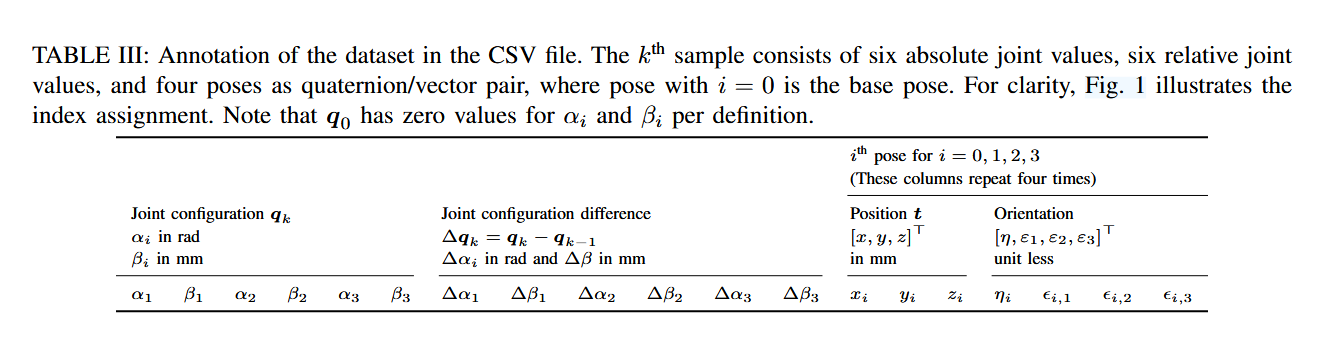

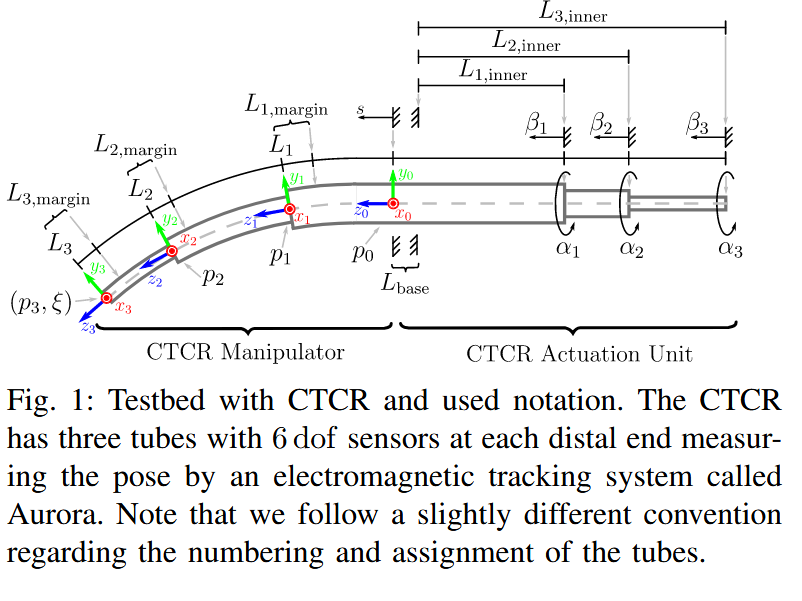

In [3]:
df.columns  = ['alpha1', 'beta1', 'alpha2', 'beta2','alpha3','beta3',                     # joint configuration qk
               'd_alpha1', 'd_beta1', 'd_alpha2', 'd_beta2', 'd_alpha3', 'd_beta3',       # joint configuration d_qk
               'x0', 'y0', 'z0', 'eta0', 'eps0,1', 'eps0,2', 'eps0,3',                    # 0th pose
               'x1', 'y1', 'z1', 'eta1', 'eps1,1', 'eps1,2', 'eps1,3',                    # 1st pose
               'x2', 'y2', 'z2', 'eta2', 'eps2,1', 'eps2,2', 'eps2,3',                    # 2nd pose
               'x3', 'y3', 'z3', 'eta3', 'eps3,1', 'eps3,2', 'eps3,3']                    # 3rd pose

df

alpha1       beta1    alpha2      beta2    alpha3      beta3  \
0     -1.038446   -8.648766 -0.934423  -4.659318 -0.518523  -3.419294   
1     -0.849078  -12.935190 -0.948167  -4.141172 -0.835220  -1.755485   
2     -1.017749  -12.567895 -0.812003 -12.013610 -0.812547  -8.885584   
3     -0.549890  -12.088090 -0.942784 -10.099092 -0.983485  -6.809770   
4     -0.983188  -22.793282 -0.975256  -3.773322 -0.944051  -1.200367   
...         ...         ...       ...        ...       ...        ...   
99995  1.013616 -115.908578  0.129843 -86.372926  0.793488 -47.812503   
99996  0.991986 -116.383328  0.789818 -88.284428  0.139324 -44.712237   
99997  0.987575 -113.233227  0.737640 -82.726911  0.921319 -42.586561   
99998  0.881862 -117.309543  0.918263 -85.435163  0.594123 -48.462650   
99999  0.618577 -123.498620  0.502818 -94.074584  0.843519 -49.858772   

       d_alpha1    d_beta1  d_alpha2   d_beta2  ...    eps2,1    eps2,2  \
0     -1.038446  -8.648766 -0.934423 -4.659318  ...  0.086870 -0.409851   
1      0.189368  -4.286425 -0.013744  0.518146  ...  0.122501 -0.453856   
2     -0.168671   0.367295  0.136164 -7.872439  ...  0.095631 -0.442791   
3      0.467859   0.479805 -0.130781  1.914518  ...  0.136366 -0.478341   
4     -0.433298 -10.705192 -0.032472  6.325771  ...  0.155923 -0.473531   
...         ...        ...       ...       ...  ...       ...       ...   
99995  0.660221   3.220634  0.054423  4.742424  ... -0.465600 -0.127947   
99996 -0.021630  -0.474749  0.659975 -1.911502  ... -0.425068 -0.162333   
99997 -0.004412   3.150100 -0.052177  5.557516  ... -0.522901 -0.001744   
99998 -0.105713  -4.076316  0.180623 -2.708252  ... -0.482495 -0.034416   
99999 -0.263285  -6.189077 -0.415445 -8.639421  ... -0.519509 -0.081435   

         eps2,3         x3         y3          z3      eta3    eps3,1  \
0      0.548841 -51.311665 -52.394960 -196.172089  0.651852  0.402930   
1      0.544632 -50.692317 -60.809199 -208.382272  0.598864  0.371977   
2      0.565367 -45.198441 -62.608553 -201.395251  0.611581  0.389910   
3      0.542060 -47.439516 -65.997012 -207.153421  0.527576  0.289144   
4      0.541701 -51.306577 -58.613165 -219.831348  0.616890  0.331818   
...         ...        ...        ...         ...       ...       ...   
99995  0.686238  11.500513  28.227900 -245.757880  0.634882 -0.383059   
99996  0.736364  10.706496  17.988644 -240.644806  0.604545 -0.346952   
99997  0.723779   9.452766  35.094901 -250.906354  0.580659 -0.459221   
99998  0.741441  12.219248  28.893432 -247.017541  0.576371 -0.444613   
99999  0.714351  16.364599  27.650480 -251.611725  0.616123 -0.426460   

         eps3,2    eps3,3  
0     -0.085287  0.636759  
1     -0.123544  0.698378  
2     -0.085298  0.683128  
3     -0.097064  0.792867  
4     -0.194669  0.686621  
...         ...       ...  
99995  0.067531  0.667555  
99996  0.039395  0.715960  
99997  0.149290  0.655487  
99998  0.094256  0.679140  
99999  0.075815  0.657858  

[100000 rows x 40 columns]

In [4]:
df.describe()

alpha1          beta1         alpha2          beta2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.002275     -65.006369       0.000954     -47.554744   
std         0.604197      21.923252       0.603566      19.431823   
min        -1.047196    -128.607520      -1.047185     -94.899929   
25%        -0.527735     -80.652032      -0.521451     -61.517094   
50%        -0.005026     -65.078763      -0.000581     -47.581506   
75%         0.521827     -49.470176       0.522425     -33.582706   
max         1.047153      -0.511163       1.047180      -0.269727   

              alpha3          beta3       d_alpha1        d_beta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.002212     -24.989130       0.000068      -0.009624   
std         0.604409      14.421860       0.826552      13.641847   
min        -1.047158     -49.998779      -2.075505     -55.687206   
25%        -0.522239     -37.479649      -0.578014      -9.321451   
50%         0.002688     -25.030116      -0.001707      -0.025989   
75%         0.524486     -12.529527       0.581041       9.279608   
max         1.047189      -0.000058       2.086869      52.333320   

            d_alpha2        d_beta2  ...         eps2,1         eps2,2  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        0.000064      -0.007282  ...      -0.235298      -0.241287   
std         0.830880      13.568265  ...       0.132140       0.142874   
min        -2.087711     -57.273481  ...      -0.578779      -0.625398   
25%        -0.585607      -9.194281  ...      -0.331642      -0.347048   
50%         0.003449      -0.026883  ...      -0.243538      -0.252719   
75%         0.583411       9.207932  ...      -0.143586      -0.139645   
max         2.084141      61.036353  ...       0.181712       0.428353   

              eps2,3             x3             y3             z3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.660118     -21.200480       8.217807    -214.128752   
std         0.076612      14.701703      25.034383      13.678106   
min         0.211942     -72.176044     -65.997012    -255.109247   
25%         0.600882     -32.561901     -11.280424    -223.967005   
50%         0.668992     -20.518868       8.374310    -214.380231   
75%         0.721549      -9.878360      27.622821    -204.579292   
max         0.930764      18.589407      85.632458    -172.815256   

                eta3         eps3,1         eps3,2         eps3,3  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.709226      -0.043455       0.021765       0.663939  
std         0.084203       0.140949       0.137199       0.089675  
min         0.117831      -0.487101      -0.582243      -0.164765  
25%         0.657030      -0.140696      -0.073484       0.606037  
50%         0.710893      -0.044395       0.020701       0.665420  
75%         0.766018       0.054800       0.117321       0.725387  
max         0.968191       0.438680       0.511710       0.957530  

[8 rows x 40 columns]

## 2. Data Preprocessing

In this section, some data preprocessing tasks will be performed. First, it is necessary to see if the data has any missing value.

### 2.1. Data Cleaning

In [5]:
mv = df.isnull().sum()

mv

alpha1      0
beta1       0
alpha2      0
beta2       0
alpha3      0
beta3       0
d_alpha1    0
d_beta1     0
d_alpha2    0
d_beta2     0
d_alpha3    0
d_beta3     0
x0          0
y0          0
z0          0
eta0        0
eps0,1      0
eps0,2      0
eps0,3      0
x1          0
y1          0
z1          0
eta1        0
eps1,1      0
eps1,2      0
eps1,3      0
x2          0
y2          0
z2          0
eta2        0
eps2,1      0
eps2,2      0
eps2,3      0
x3          0
y3          0
z3          0
eta3        0
eps3,1      0
eps3,2      0
eps3,3      0
dtype: int64

Since there was no missing value, further data cleaning tasks are not necessary. This data is understandably clean since it was taken in a controlled laboratory environment.

### 2.2. Exploratory Data Analysis

General correlation among features can be seen as following:

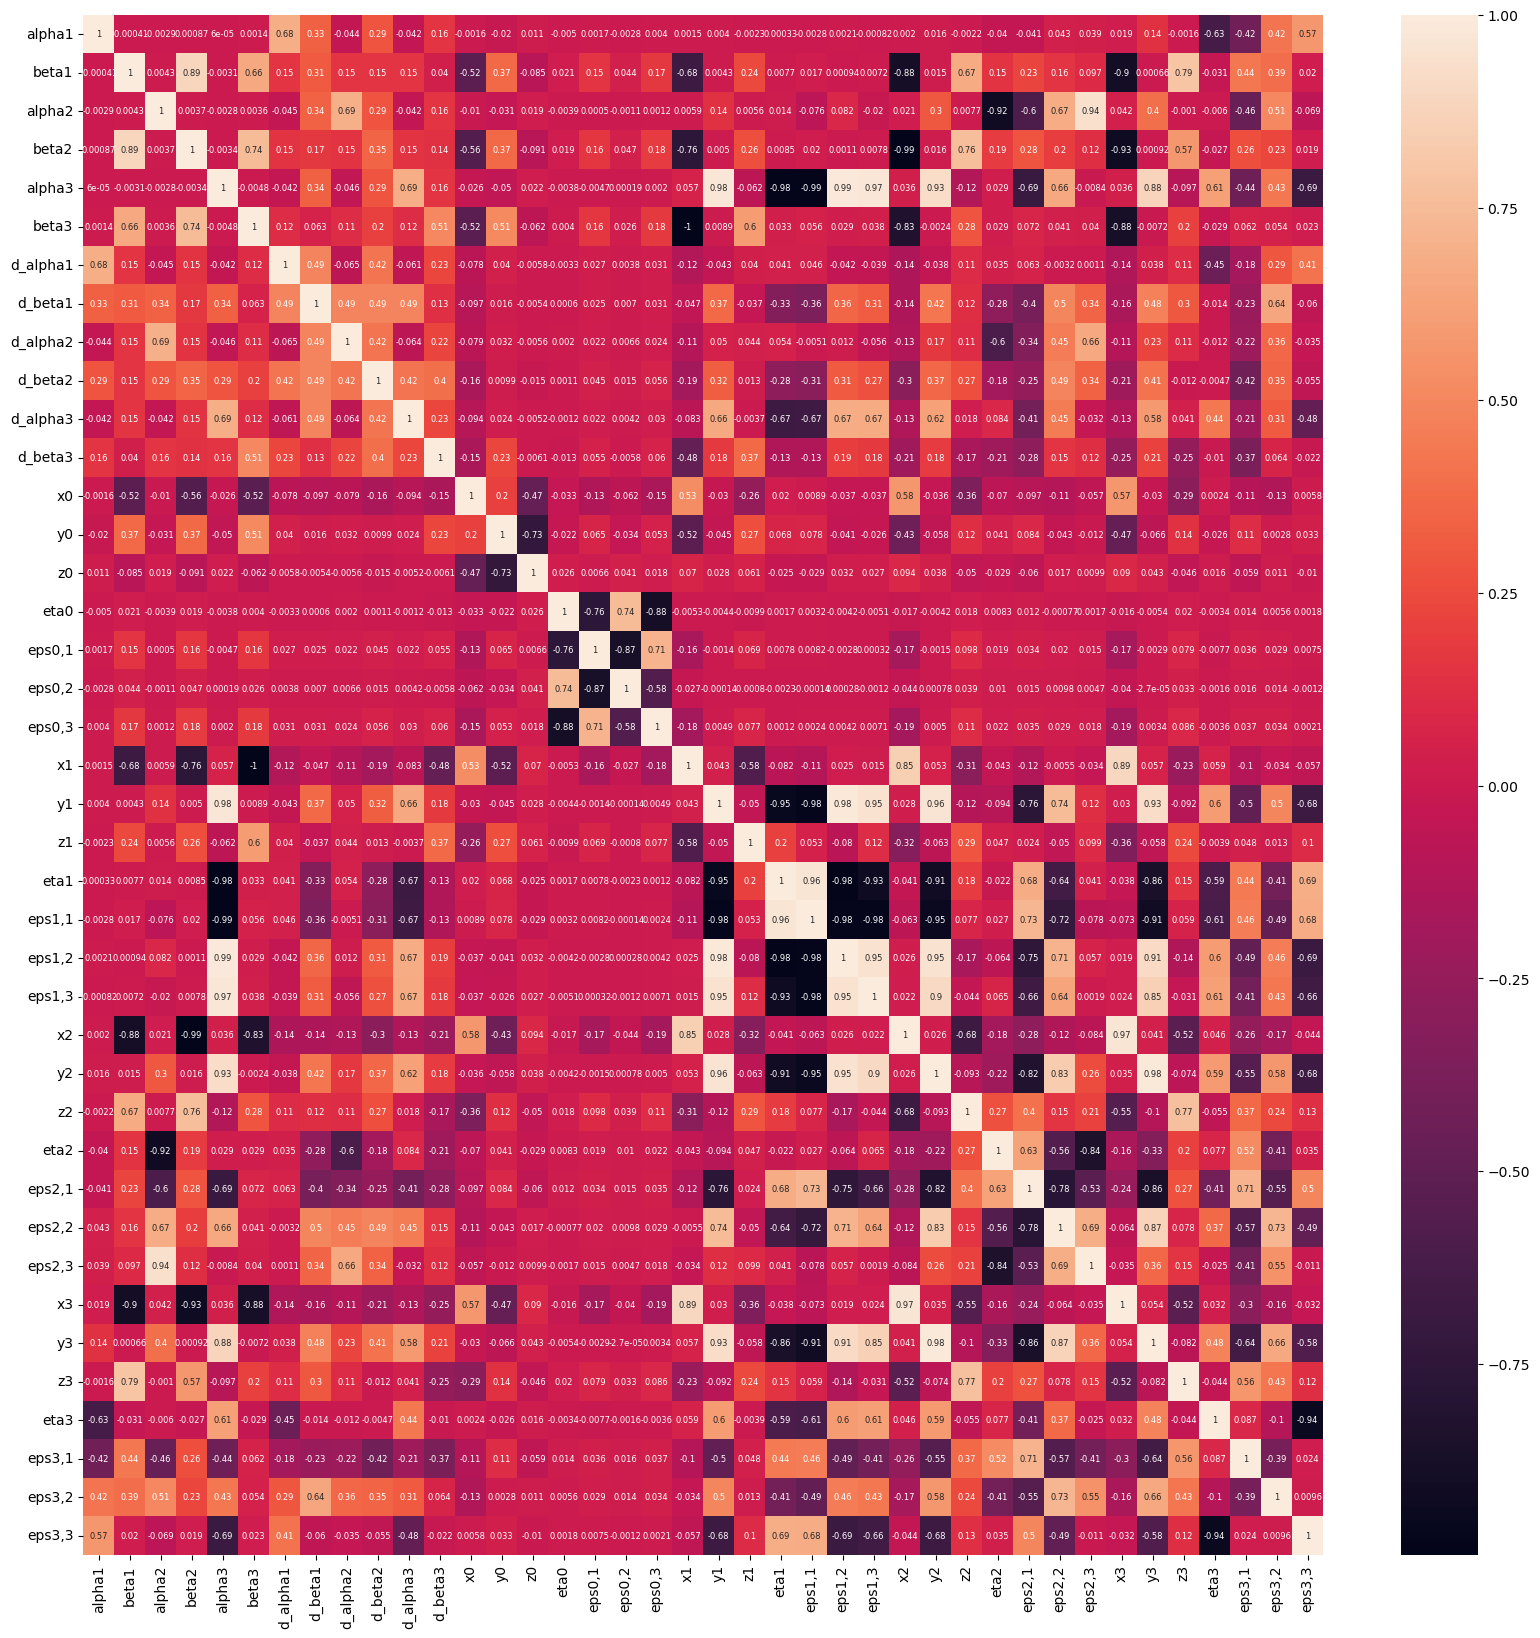

In [6]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":6})
plt.show()


Based on the paper, the Shape Representation can be simplified as following:

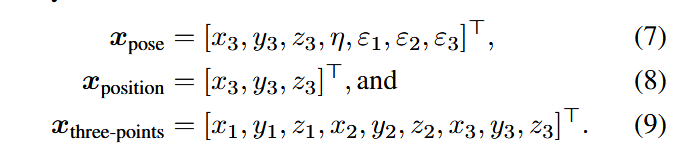

Thus, the correlation between Joint Space Representation and Shape Representation can be visualized using a heatmap.

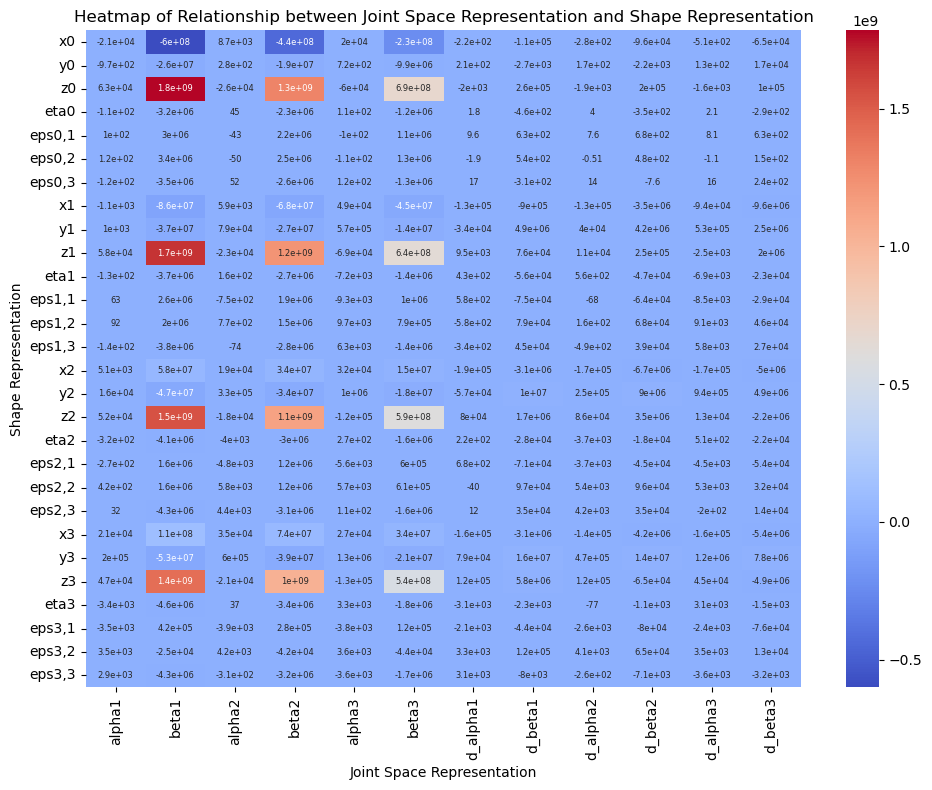

In [7]:
# Split the dataset into two parts: first 12 columns and remaining 28 columns
# The first 12 columns are Joint Space Representation, and the rest are Shape Reperesentation
first_12_columns = df.iloc[:, :12]
remaining_columns = df.iloc[:, 12:]


# Compute the dot product 
# correlation_matrix = first_12_columns.T.dot(remaining_columns)
correlation_matrix = remaining_columns.T.dot(first_12_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 6}, cmap="coolwarm", xticklabels=first_12_columns.columns, yticklabels=remaining_columns.columns)
plt.title("Heatmap of Relationship between Joint Space Representation and Shape Representation")
plt.ylabel("Shape Representation")
plt.xlabel("Joint Space Representation")
plt.tight_layout()
plt.show()





Since: 

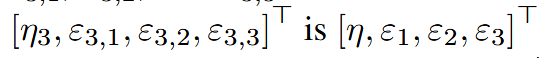

The heatmap can be simplified as following:

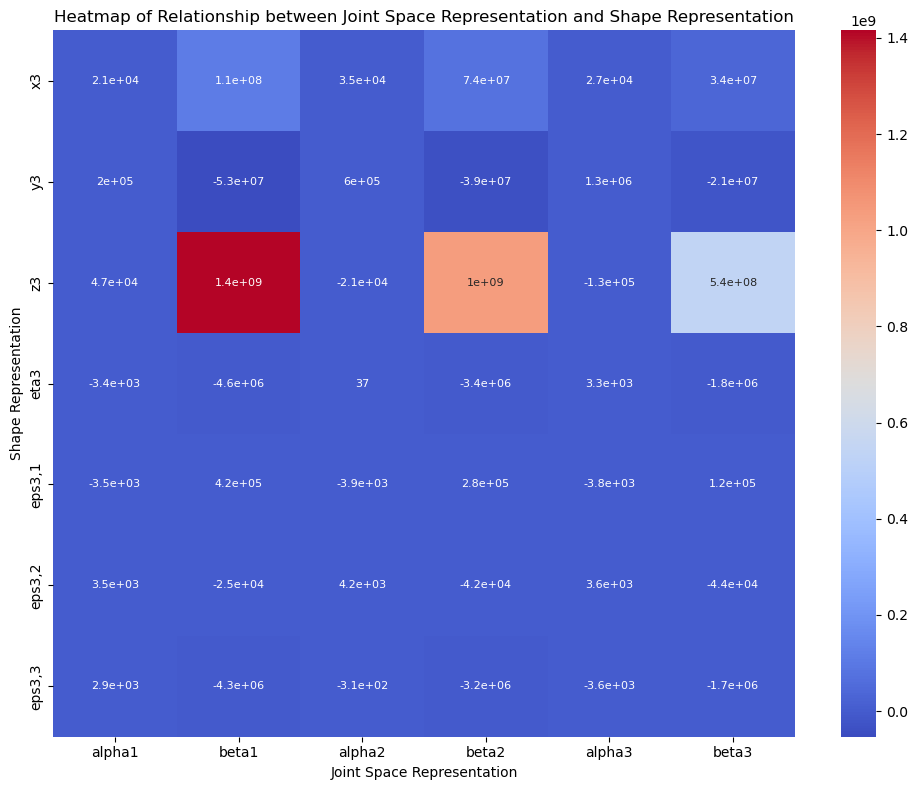

In [8]:
joint_rep = df.iloc[:, :6]

shape_rep = df.loc[:,['x3', 'y3', 'z3', 'eta3', 'eps3,1', 'eps3,2', 'eps3,3']]

position_rep = df.loc[:,['x3', 'y3', 'z3']]

orientation_rep = df.loc[:,['eta3', 'eps3,1', 'eps3,2', 'eps3,3']]

correlation_matrix = shape_rep.T.dot(joint_rep)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap="coolwarm", xticklabels=joint_rep.columns, yticklabels=shape_rep.columns)
plt.title("Heatmap of Relationship between Joint Space Representation and Shape Representation")
plt.ylabel("Shape Representation")
plt.xlabel("Joint Space Representation")
plt.tight_layout()
plt.show()

Regression plot can be visualized to understand better the relation of joint configurations with respect to each pose. Here are plots for 7 components of pose.

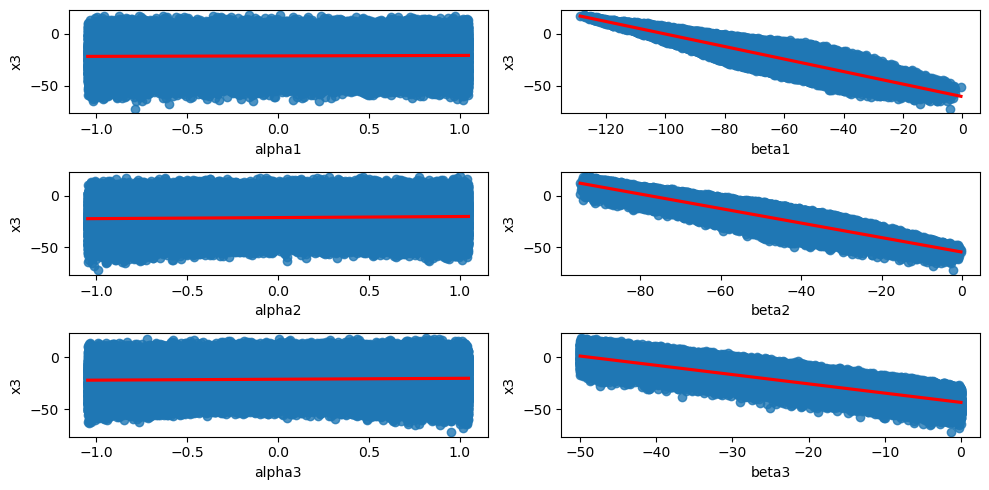

In [ ]:
# x3 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['x3'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

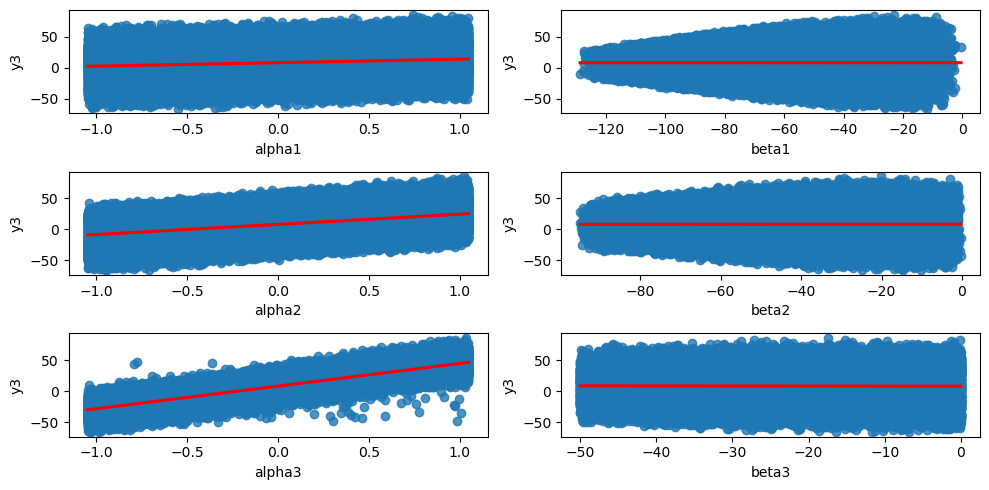

In [ ]:
# y3 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['y3'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

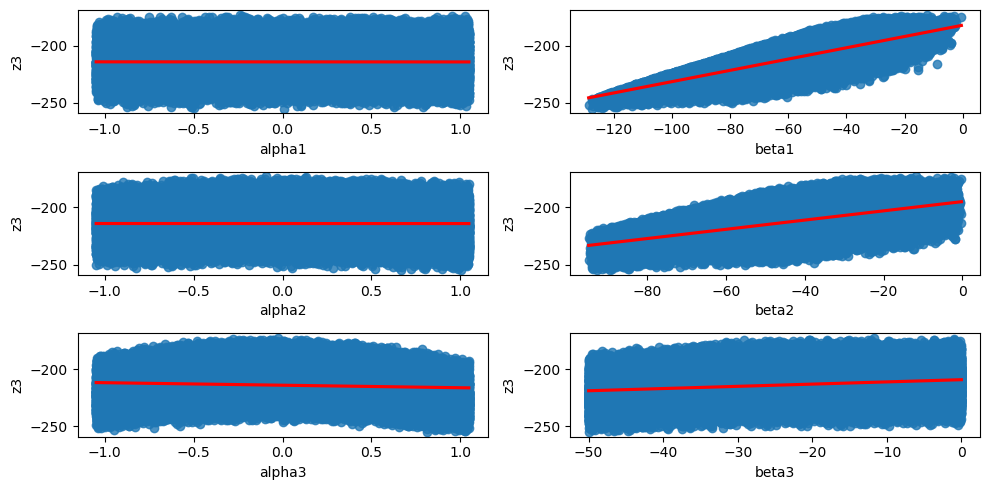

In [ ]:
# z3 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['z3'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

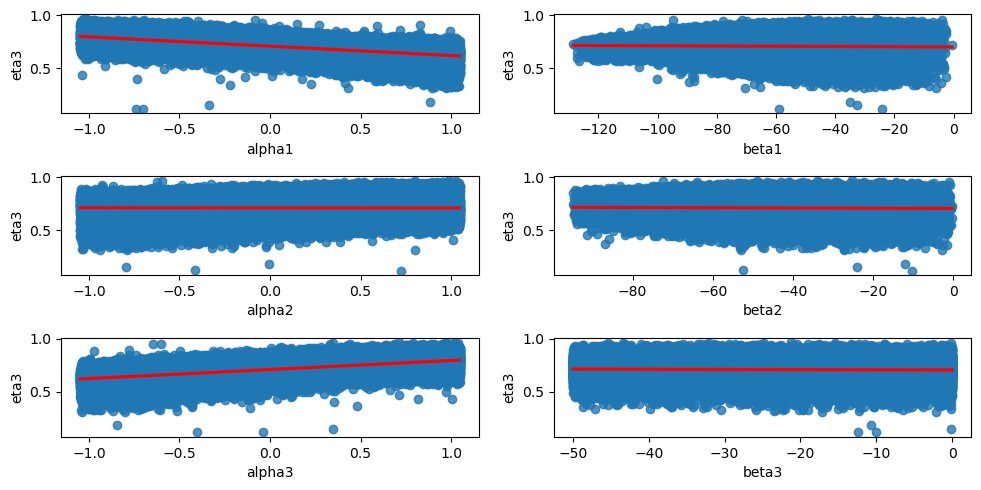

In [ ]:
# eta3 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['eta3'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

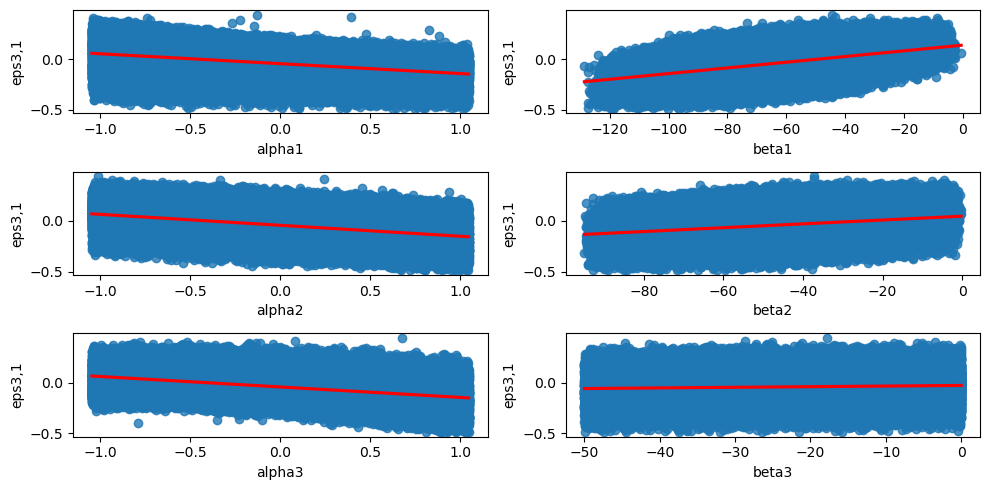

In [ ]:
# eps3.1 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['eps3,1'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

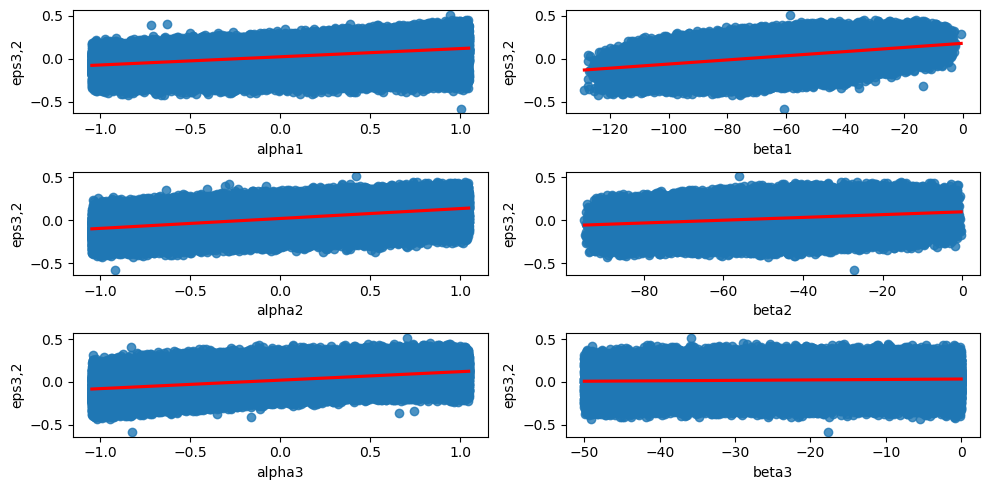

In [ ]:
# eps3.2 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['eps3,2'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

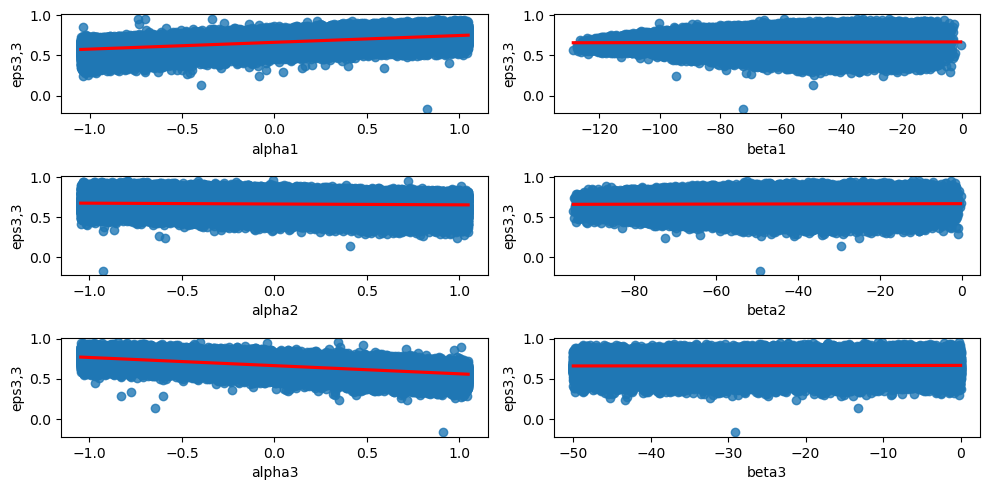

In [ ]:
# eps3.3 of pose

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(10, 5)

joints = list(df.columns[:6])

for p in range(3):
    for q in range(2):
        sns.regplot(x=df.iloc[:,q+p*2],y=df['eps3,3'],line_kws={"color":"red"},ax=axes[p,q])

plt.tight_layout()

Strange behaviour of the robot can also be checked through boxplot, to see the outlier values, where in this case show the snapping phenomenon as mentioned in the paper.

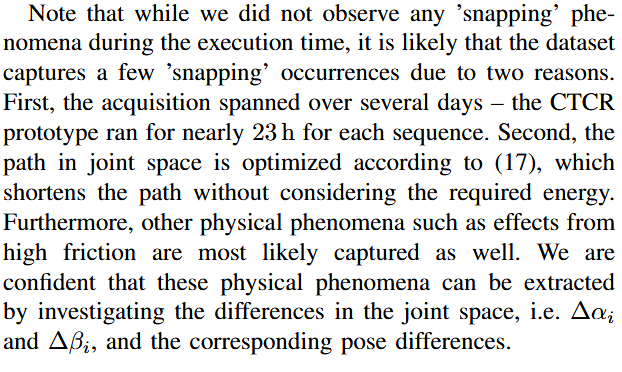

<Axes: >

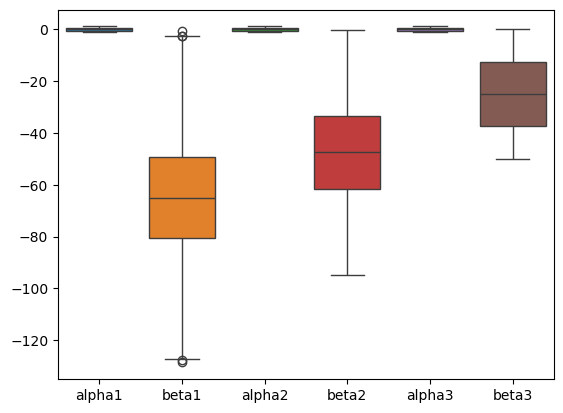

In [9]:
sns.boxplot(joint_rep)

<Axes: >

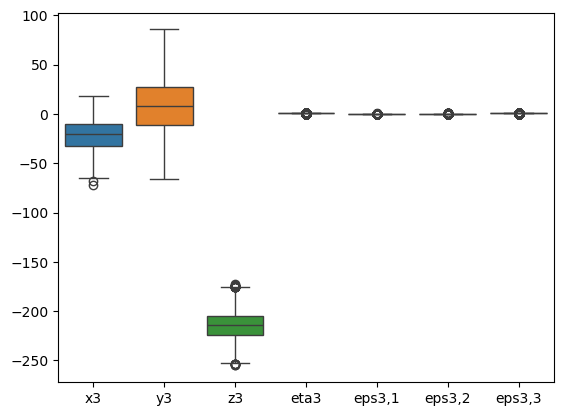

In [10]:
sns.boxplot(shape_rep)

### 2.3. Train-Test Split

Next step, data can be splitted into training and testing sets, where 80% for training and 20% for testing.

In [11]:
from sklearn.model_selection import train_test_split

joint_rep_train, joint_rep_test, position_rep_train, position_rep_test, orientation_rep_train, orientation_rep_test = train_test_split(joint_rep, 
                                                                                                                                       position_rep, 
                                                                                                                                       orientation_rep,
                                                                                                                                       test_size=0.2, 
                                                                                                                                       random_state= 42)

print(joint_rep_train.shape, joint_rep_test.shape)
print(position_rep_train.shape, position_rep_test.shape)
print(orientation_rep_train.shape, orientation_rep_test.shape)

(80000, 6) (20000, 6)
(80000, 3) (20000, 3)
(80000, 4) (20000, 4)


In this case, the pose is divided into position and orientation because for each, there would be different error approximation methods, which will be shown in the next section.

## 3. Regressions

To model the forward kinematics of CTCR, the proposed method on the paper was Feedforward Neural Network. However, in this notebook, classic data mining techniques will be used, such as Linear Regression, Random Forest Regression and K-Neighbours Regression and ExtraTrees Regression which is class that implements a meta estimator that fits a number of randomized decision trees

Important metric to take into account is the error measurement for the pose, both position and orientation. Below is the equation for error approximation.

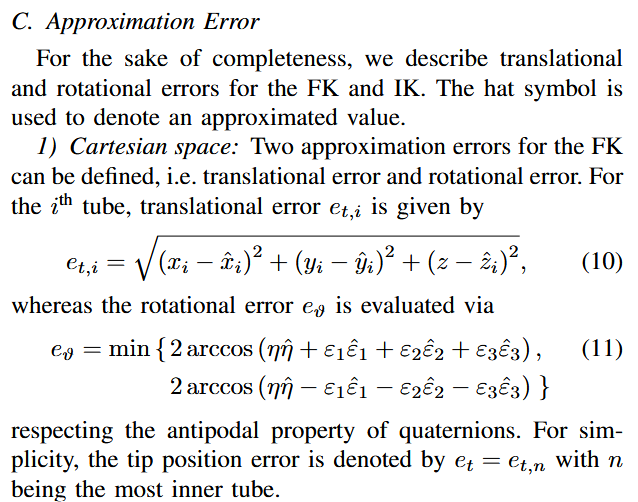

For position error, it is already compensated with mean_absolute_error function, **since they are equal**. However, the error equations for orientation is still need to be customly implemented.

In [12]:
import math
import numpy as np

# Error approximator for orientation
def mean_orientation_error(theta_true,theta_pred):
    error_list = [] 
    for count, row in enumerate(theta_true.itertuples(index=True)):
        sum = (theta_true['eta3'].iloc[count]*theta_pred[count][0])+(theta_true['eps3,1'].iloc[count]*theta_pred[count][1])+(theta_true['eps3,2'].iloc[count]*theta_pred[count][2])+(theta_true['eps3,3'].iloc[count]*theta_pred[count][3])
        if sum>1:
            sum = 1
        elif sum<-1:
            sum = -1

        a = 2*math.acos(sum)
        
        subt = (theta_true['eta3'].iloc[count]*theta_pred[count][0])-(theta_true['eps3,1'].iloc[count]*theta_pred[count][1])-(theta_true['eps3,2'].iloc[count]*theta_pred[count][2])-(theta_true['eps3,3'].iloc[count]*theta_pred[count][3])
        if subt>1:
            subt = 1
        elif subt<-1:
            subt = -1
            
        b = 2*math.acos(subt)

        error = min(a,b)
        error_list.append(error)
        
    return math.degrees(np.mean(error_list))


Some custom functions to display the performance of the model:

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

def display_prediction(output_true, output_pred, count, is_orientation=False):
    print("Predictions:")
    if is_orientation == True:
        print(output_true.assign(
            eta3_pred=output_pred[:, 0],
            eps31_pred=output_pred[:, 1],
            eps32_pred=output_pred[:, 2],
            eps33_pred=output_pred[:, 3],
        ).head(count).to_markdown(index=False))
    else:
        print(output_true.assign(
            x3_pred=output_pred[:, 0],
            y3_pred=output_pred[:, 1],
            z3_pred=output_pred[:, 2],
        ).head(count).to_markdown(index=False))

def display_results(output_true, output_pred, count=5, is_orientation=False):
    print("R2 score:", r2_score(output_true, output_pred))
    print("Mean squared error:", mean_squared_error(output_true, output_pred))
    if is_orientation == True:
        print("Mean orientation error: ", mean_orientation_error(output_true,output_pred))
    else:
        print("Mean absolute error:", mean_absolute_error(output_true, output_pred))
    print("Root mean squared error:", root_mean_squared_error(output_true,output_pred))
    display_prediction(output_true, output_pred, count,is_orientation)


### 3.1. Linear Regression

Modeling tip position using Linear Regression:

In [14]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(joint_rep_train, position_rep_train)
display_results(position_rep_test,linear.predict(joint_rep_test))

R2 score: 0.9199164082076323
Mean squared error: 21.691087371607825
Mean absolute error: 3.451912038255079
Root mean squared error: 4.442601569830295
Predictions:
|        x3 |        y3 |       z3 |   x3_pred |   y3_pred |   z3_pred |
|----------:|----------:|---------:|----------:|----------:|----------:|
| -38.034   | -37.0504  | -205.248 | -37.7516  | -28.5484  |  -196.887 |
|  -7.06215 | -34.8606  | -215.312 |  -7.84741 | -32.7274  |  -205.41  |
|  -8.86027 | -23.5796  | -216.399 |  -9.31574 | -24.8515  |  -213.487 |
| -39.3707  |  -5.25704 | -206.297 | -37.6244  |  -2.23595 |  -210.016 |
| -30.271   |  56.0222  | -219.356 | -31.3902  |  50.6505  |  -208.411 |


Plotting x3, y3, and z3 between true and predicted values

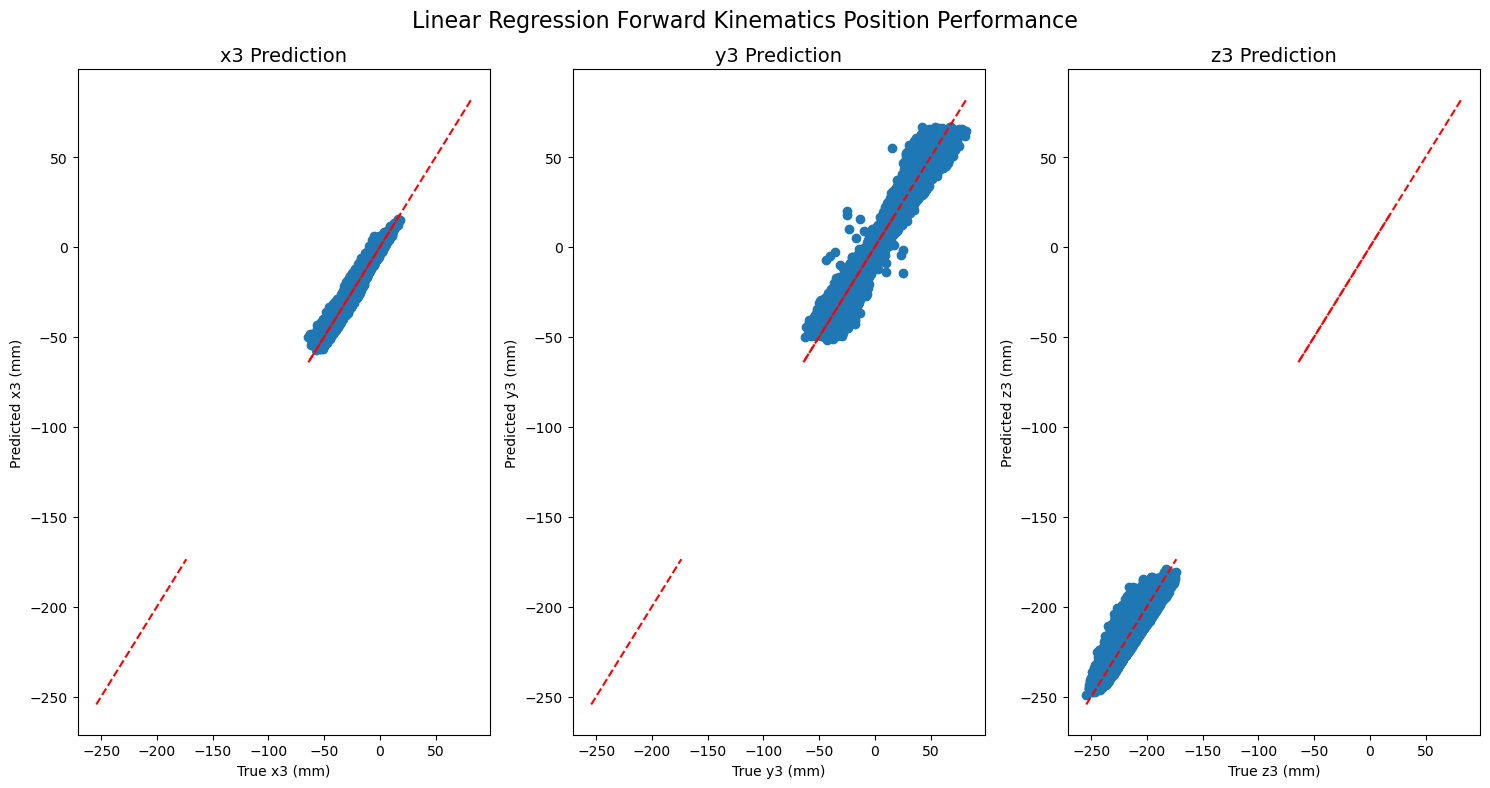

In [15]:
# Plot true vs predicted x3,y3,z3 coordinates

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

fig.suptitle("Linear Regression Forward Kinematics Position Performance", fontsize=16)

position_rep_pred = linear.predict(joint_rep_test)
axs[0].scatter(list(position_rep_test.iloc[:,0]), position_rep_pred[:, 0])
axs[0].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[0].set_xlabel("True x3 (mm)")
axs[0].set_ylabel("Predicted x3 (mm)")
axs[0].set_title("x3 Prediction", fontsize=14)

axs[1].scatter(list(position_rep_test.iloc[:,1]), position_rep_pred[:, 1])
axs[1].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[1].set_xlabel("True y3 (mm)")
axs[1].set_ylabel("Predicted y3 (mm)")
axs[1].set_title("y3 Prediction", fontsize=14)

axs[2].scatter(list(position_rep_test.iloc[:,2]), position_rep_pred[:, 2])
axs[2].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[2].set_xlabel("True z3 (mm)")
axs[2].set_ylabel("Predicted z3 (mm)")
axs[2].set_title("z3 Prediction", fontsize=14)

plt.tight_layout()

plt.show()

Modeling tip orientation using Linear Regression:

In [16]:
linear.fit(joint_rep_train, orientation_rep_train)
display_results(orientation_rep_test, linear.predict(joint_rep_test),is_orientation=True)

R2 score: 0.8322767988392298
Mean squared error: 0.0019883122594129155
Mean orientation error:  14.174700520845656
Root mean squared error: 0.04435645513523989
Predictions:
|     eta3 |     eps3,1 |     eps3,2 |   eps3,3 |   eta3_pred |   eps31_pred |   eps32_pred |   eps33_pred |
|---------:|-----------:|-----------:|---------:|------------:|-------------:|-------------:|-------------:|
| 0.652411 |  0.180376  | -0.0398775 | 0.735006 |    0.674498 |    0.195978  |   -0.0315799 |     0.713709 |
| 0.658822 |  0.222417  | -0.11919   | 0.708716 |    0.698667 |    0.219061  |   -0.138055  |     0.696277 |
| 0.637724 |  0.0795867 | -0.08513   | 0.761398 |    0.630401 |    0.0750344 |   -0.0923371 |     0.760783 |
| 0.750399 |  0.0796033 | -0.114418  | 0.646122 |    0.700697 |    0.0287685 |   -0.0535735 |     0.679898 |
| 0.805291 | -0.155318  |  0.208645  | 0.532776 |    0.780374 |   -0.155355  |    0.213679  |     0.571167 |


Plotting eta3, eps31, eps32, and eps33 between true and predicted values:

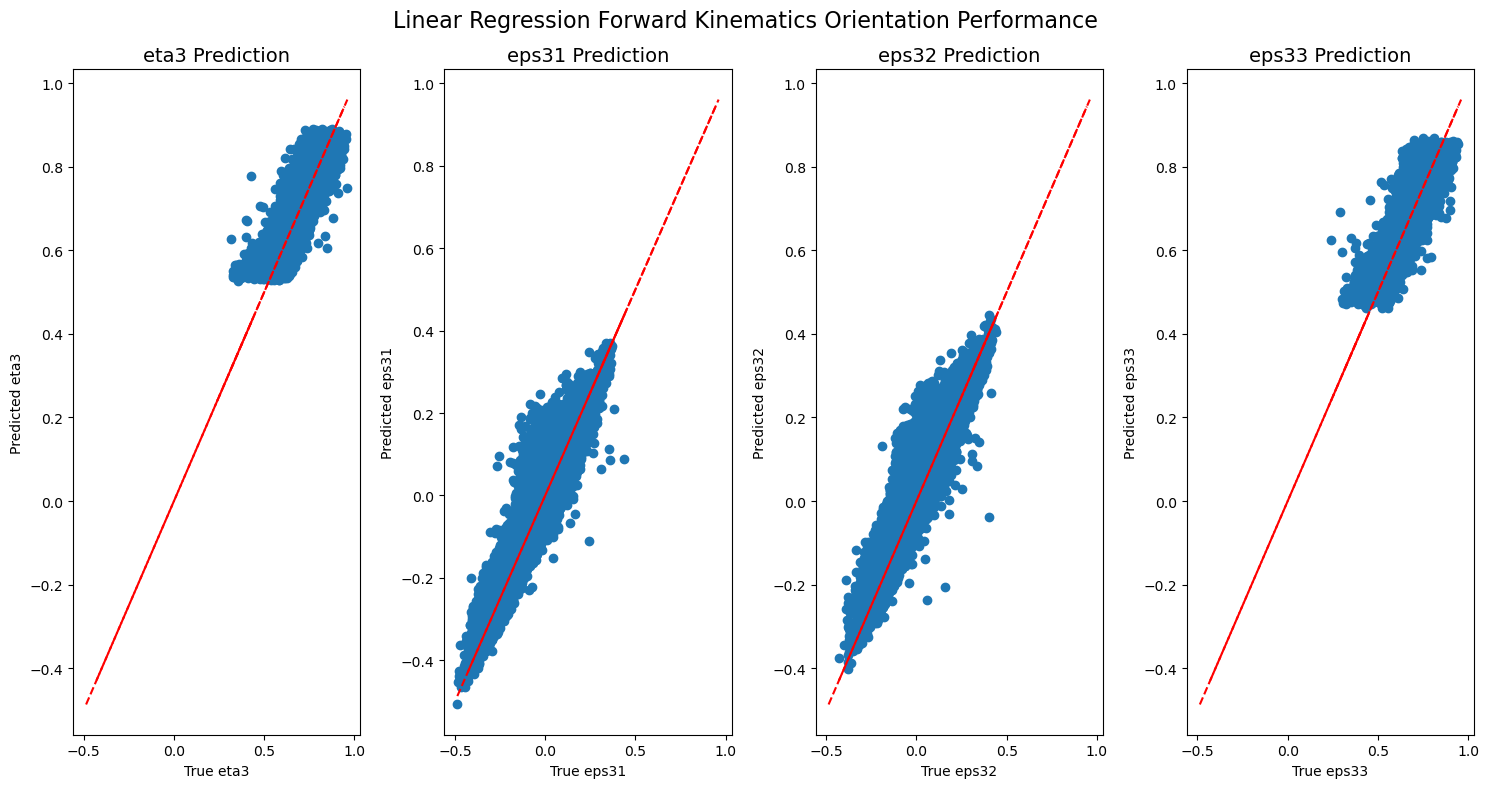

In [17]:
# Plot true vs predicted eta3, eps31, eps32, and eps33

fig, axs = plt.subplots(1, 4, figsize=(15, 8))

fig.suptitle("Linear Regression Forward Kinematics Orientation Performance", fontsize=16)

orientation_rep_pred = linear.predict(joint_rep_test)

axs[0].scatter(list(orientation_rep_test.iloc[:,0]), orientation_rep_pred[:, 0])
axs[0].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[0].set_xlabel("True eta3")
axs[0].set_ylabel("Predicted eta3")
axs[0].set_title("eta3 Prediction", fontsize=14)

axs[1].scatter(list(orientation_rep_test.iloc[:,1]), orientation_rep_pred[:, 1])
axs[1].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[1].set_xlabel("True eps31")
axs[1].set_ylabel("Predicted eps31")
axs[1].set_title("eps31 Prediction", fontsize=14)

axs[2].scatter(list(orientation_rep_test.iloc[:,2]), orientation_rep_pred[:, 2])
axs[2].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[2].set_xlabel("True eps32")
axs[2].set_ylabel("Predicted eps32")
axs[2].set_title("eps32 Prediction", fontsize=14)

axs[3].scatter(list(orientation_rep_test.iloc[:,3]), orientation_rep_pred[:, 3])
axs[3].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[3].set_xlabel("True eps33")
axs[3].set_ylabel("Predicted eps33")
axs[3].set_title("eps33 Prediction", fontsize=14)

plt.tight_layout()

plt.show()

### 3.2. Random Forest Regression

Modeling tip position using Random Forest Regression:

In [18]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(joint_rep_train,position_rep_train)
display_results(position_rep_test,rdf.predict(joint_rep_test))

R2 score: 0.9900398123644045
Mean squared error: 3.431548270927928
Mean absolute error: 1.3013557488855911
Root mean squared error: 1.7640478062278928
Predictions:
|        x3 |        y3 |       z3 |   x3_pred |   y3_pred |   z3_pred |
|----------:|----------:|---------:|----------:|----------:|----------:|
| -38.034   | -37.0504  | -205.248 | -39.7506  | -32.3019  |  -205.159 |
|  -7.06215 | -34.8606  | -215.312 |  -9.65661 | -33.6582  |  -216.706 |
|  -8.86027 | -23.5796  | -216.399 |  -8.84114 | -21.3227  |  -216.959 |
| -39.3707  |  -5.25704 | -206.297 | -38.9742  |  -5.35738 |  -206.209 |
| -30.271   |  56.0222  | -219.356 | -32.5058  |  54.7278  |  -220.593 |


Plotting x3, y3, and z3 between true and predicted values:

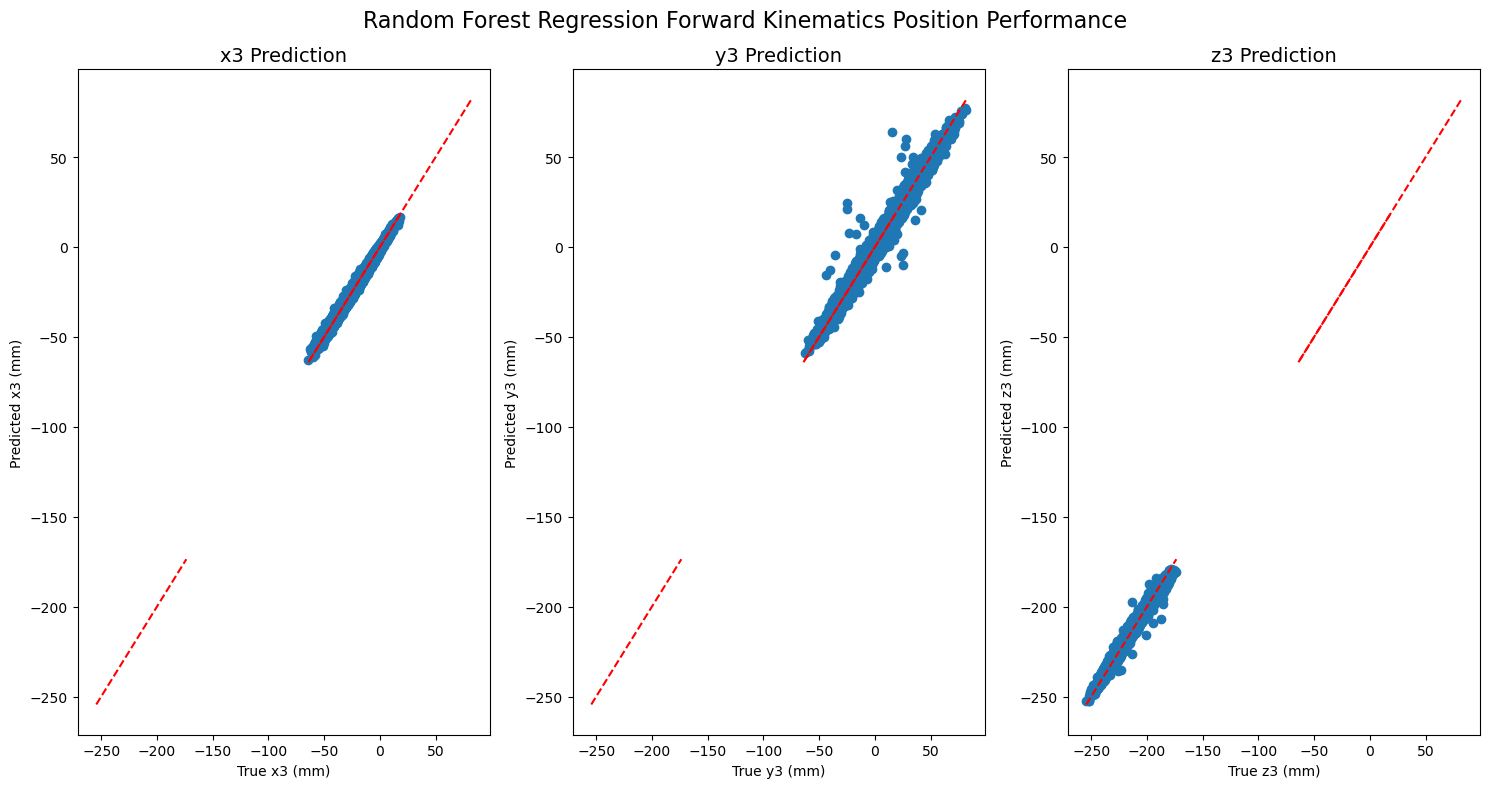

In [19]:
# Plot true vs predicted x3,y3,z3 coordinates

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

fig.suptitle("Random Forest Regression Forward Kinematics Position Performance", fontsize=16)

position_rep_pred = rdf.predict(joint_rep_test)
axs[0].scatter(list(position_rep_test.iloc[:,0]), position_rep_pred[:, 0])
axs[0].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[0].set_xlabel("True x3 (mm)")
axs[0].set_ylabel("Predicted x3 (mm)")
axs[0].set_title("x3 Prediction", fontsize=14)

axs[1].scatter(list(position_rep_test.iloc[:,1]), position_rep_pred[:, 1])
axs[1].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[1].set_xlabel("True y3 (mm)")
axs[1].set_ylabel("Predicted y3 (mm)")
axs[1].set_title("y3 Prediction", fontsize=14)

axs[2].scatter(list(position_rep_test.iloc[:,2]), position_rep_pred[:, 2])
axs[2].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[2].set_xlabel("True z3 (mm)")
axs[2].set_ylabel("Predicted z3 (mm)")
axs[2].set_title("z3 Prediction", fontsize=14)

plt.tight_layout()

plt.show()

Modeling tip orientation using Random Forest Regression:

In [20]:
rdf.fit(joint_rep_train, orientation_rep_train)
display_results(orientation_rep_test, rdf.predict(joint_rep_test),is_orientation=True)


R2 score: 0.9641946070994255
Mean squared error: 0.00045349617297538045
Mean orientation error:  8.959565144953908
Root mean squared error: 0.020999229659192944
Predictions:
|     eta3 |     eps3,1 |     eps3,2 |   eps3,3 |   eta3_pred |   eps31_pred |   eps32_pred |   eps33_pred |
|---------:|-----------:|-----------:|---------:|------------:|-------------:|-------------:|-------------:|
| 0.652411 |  0.180376  | -0.0398775 | 0.735006 |    0.681631 |    0.183608  |   -0.0348201 |     0.705172 |
| 0.658822 |  0.222417  | -0.11919   | 0.708716 |    0.664934 |    0.208212  |   -0.136958  |     0.702339 |
| 0.637724 |  0.0795867 | -0.08513   | 0.761398 |    0.632371 |    0.0707308 |   -0.114802  |     0.759845 |
| 0.750399 |  0.0796033 | -0.114418  | 0.646122 |    0.737155 |    0.0625895 |   -0.0881946 |     0.661106 |
| 0.805291 | -0.155318  |  0.208645  | 0.532776 |    0.784256 |   -0.181015  |    0.208472  |     0.550916 |


Plotting eta3, eps31, eps32, and eps33 between true and predicted values:

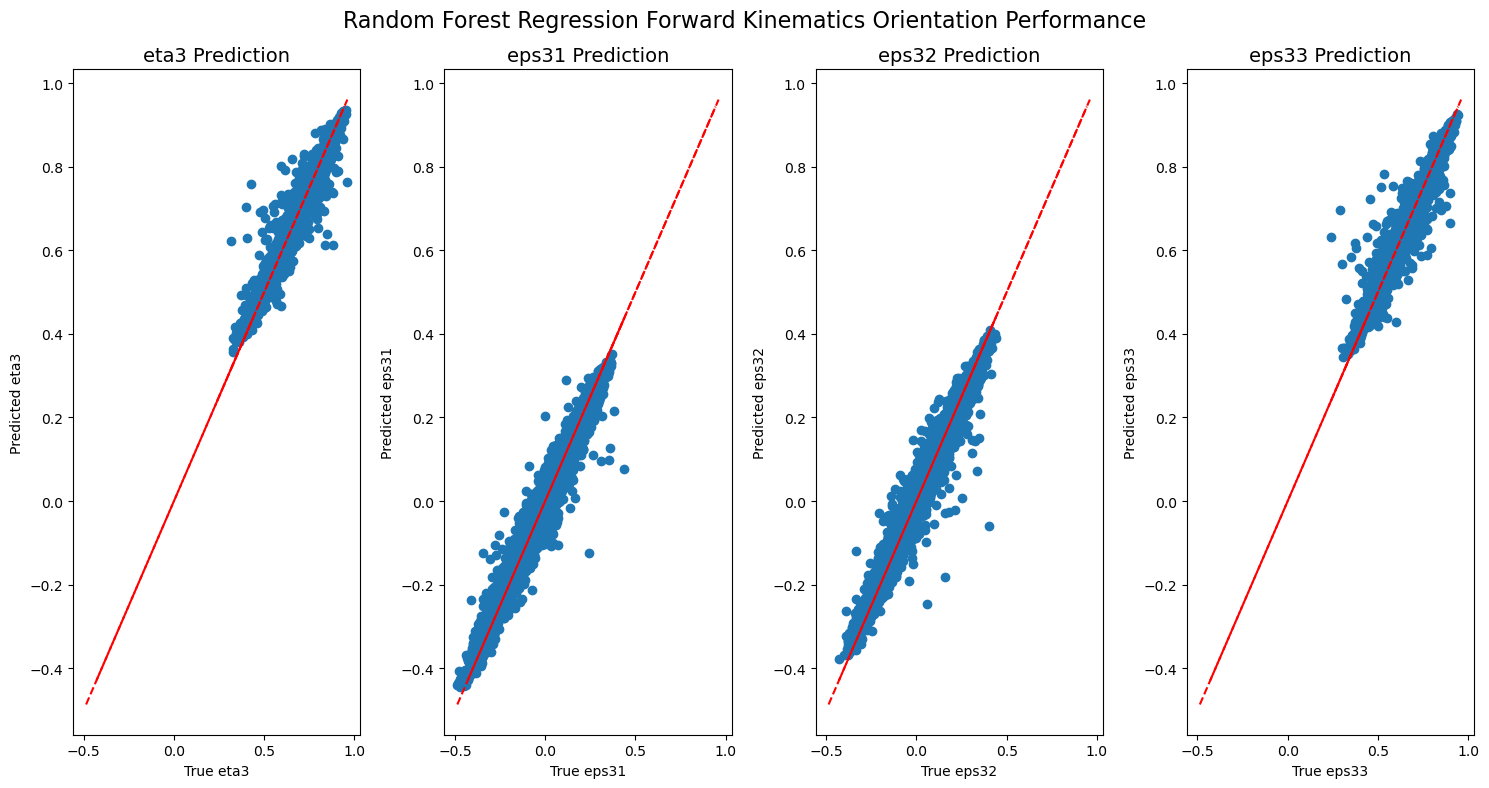

In [21]:
# Plot true vs predicted eta3, eps31, eps32, and eps33

fig, axs = plt.subplots(1, 4, figsize=(15, 8))

fig.suptitle("Random Forest Regression Forward Kinematics Orientation Performance", fontsize=16)

orientation_rep_pred = rdf.predict(joint_rep_test)

axs[0].scatter(list(orientation_rep_test.iloc[:,0]), orientation_rep_pred[:, 0])
axs[0].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[0].set_xlabel("True eta3")
axs[0].set_ylabel("Predicted eta3")
axs[0].set_title("eta3 Prediction", fontsize=14)

axs[1].scatter(list(orientation_rep_test.iloc[:,1]), orientation_rep_pred[:, 1])
axs[1].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[1].set_xlabel("True eps31")
axs[1].set_ylabel("Predicted eps31")
axs[1].set_title("eps31 Prediction", fontsize=14)

axs[2].scatter(list(orientation_rep_test.iloc[:,2]), orientation_rep_pred[:, 2])
axs[2].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[2].set_xlabel("True eps32")
axs[2].set_ylabel("Predicted eps32")
axs[2].set_title("eps32 Prediction", fontsize=14)

axs[3].scatter(list(orientation_rep_test.iloc[:,3]), orientation_rep_pred[:, 3])
axs[3].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[3].set_xlabel("True eps33")
axs[3].set_ylabel("Predicted eps33")
axs[3].set_title("eps33 Prediction", fontsize=14)

plt.tight_layout()

plt.show()

### 3.3. ExtraTrees Regression

Modeling tip position using ExtraTrees Regression:

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(joint_rep_train,position_rep_train)
display_results(position_rep_test,extra_reg.predict(joint_rep_test))

R2 score: 0.9940962629888298
Mean squared error: 2.069482622197789
Mean absolute error: 0.9463417333026194
Root mean squared error: 1.364719467444398
Predictions:
|        x3 |        y3 |       z3 |   x3_pred |   y3_pred |   z3_pred |
|----------:|----------:|---------:|----------:|----------:|----------:|
| -38.034   | -37.0504  | -205.248 | -38.5207  | -34.1774  |  -204.721 |
|  -7.06215 | -34.8606  | -215.312 |  -9.8799  | -34.2429  |  -216.033 |
|  -8.86027 | -23.5796  | -216.399 |  -9.58155 | -23.2134  |  -217.459 |
| -39.3707  |  -5.25704 | -206.297 | -38.5471  |  -6.40848 |  -206.009 |
| -30.271   |  56.0222  | -219.356 | -31.0418  |  55.9724  |  -219.668 |


Plotting x3, y3, and z3 between true and predicted values:

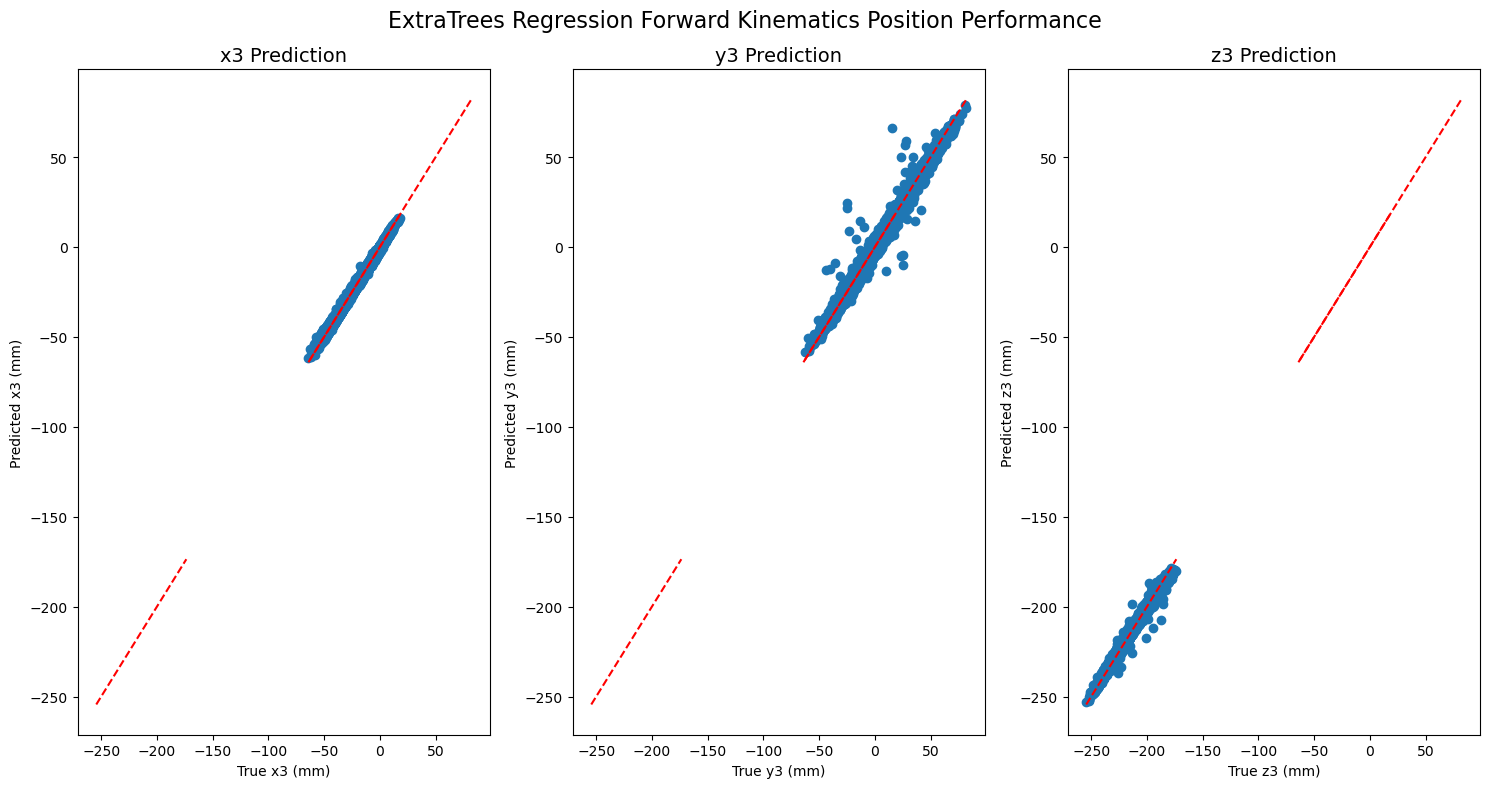

In [23]:
# Plot true vs predicted x3,y3,z3 coordinates

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

fig.suptitle("ExtraTrees Regression Forward Kinematics Position Performance", fontsize=16)

position_rep_pred = extra_reg.predict(joint_rep_test)
axs[0].scatter(list(position_rep_test.iloc[:,0]), position_rep_pred[:, 0])
axs[0].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[0].set_xlabel("True x3 (mm)")
axs[0].set_ylabel("Predicted x3 (mm)")
axs[0].set_title("x3 Prediction", fontsize=14)

axs[1].scatter(list(position_rep_test.iloc[:,1]), position_rep_pred[:, 1])
axs[1].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[1].set_xlabel("True y3 (mm)")
axs[1].set_ylabel("Predicted y3 (mm)")
axs[1].set_title("y3 Prediction", fontsize=14)

axs[2].scatter(list(position_rep_test.iloc[:,2]), position_rep_pred[:, 2])
axs[2].plot([position_rep_test.min(), position_rep_test.max()], [position_rep_test.min(), position_rep_test.max()], 'r--')
axs[2].set_xlabel("True z3 (mm)")
axs[2].set_ylabel("Predicted z3 (mm)")
axs[2].set_title("z3 Prediction", fontsize=14)

plt.tight_layout()

plt.show()

Modeling tip orientation using ExtraTrees Regression:

In [24]:
extra_reg.fit(joint_rep_train, orientation_rep_train)
display_results(orientation_rep_test, extra_reg.predict(joint_rep_test),is_orientation=True)

R2 score: 0.9713683573937772
Mean squared error: 0.00035378715950886385
Mean orientation error:  9.096990784871325
Root mean squared error: 0.018618600627546816
Predictions:
|     eta3 |     eps3,1 |     eps3,2 |   eps3,3 |   eta3_pred |   eps31_pred |   eps32_pred |   eps33_pred |
|---------:|-----------:|-----------:|---------:|------------:|-------------:|-------------:|-------------:|
| 0.652411 |  0.180376  | -0.0398775 | 0.735006 |    0.668374 |    0.181972  |   -0.0347142 |     0.717125 |
| 0.658822 |  0.222417  | -0.11919   | 0.708716 |    0.664907 |    0.20981   |   -0.138305  |     0.701496 |
| 0.637724 |  0.0795867 | -0.08513   | 0.761398 |    0.637844 |    0.0657358 |   -0.10335   |     0.756364 |
| 0.750399 |  0.0796033 | -0.114418  | 0.646122 |    0.734711 |    0.0778597 |   -0.0995747 |     0.660619 |
| 0.805291 | -0.155318  |  0.208645  | 0.532776 |    0.795983 |   -0.161534  |    0.20354   |     0.54298  |


Plotting eta3, eps31, eps32, and eps33 between true and predicted values:

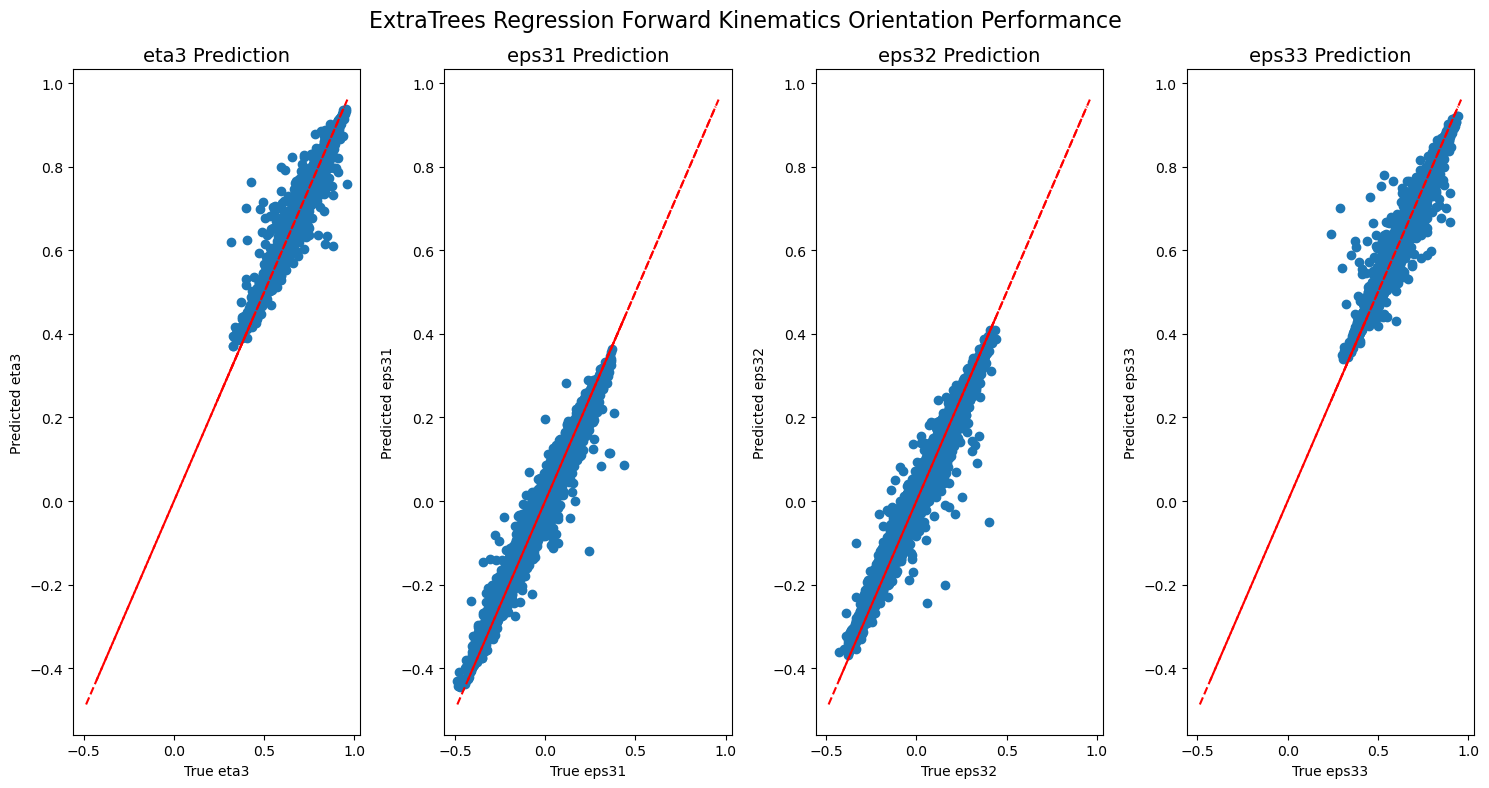

In [25]:
# Plot true vs predicted eta3, eps31, eps32, and eps33

fig, axs = plt.subplots(1, 4, figsize=(15, 8))

fig.suptitle("ExtraTrees Regression Forward Kinematics Orientation Performance", fontsize=16)

orientation_rep_pred = extra_reg.predict(joint_rep_test)

axs[0].scatter(list(orientation_rep_test.iloc[:,0]), orientation_rep_pred[:, 0])
axs[0].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[0].set_xlabel("True eta3")
axs[0].set_ylabel("Predicted eta3")
axs[0].set_title("eta3 Prediction", fontsize=14)

axs[1].scatter(list(orientation_rep_test.iloc[:,1]), orientation_rep_pred[:, 1])
axs[1].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[1].set_xlabel("True eps31")
axs[1].set_ylabel("Predicted eps31")
axs[1].set_title("eps31 Prediction", fontsize=14)

axs[2].scatter(list(orientation_rep_test.iloc[:,2]), orientation_rep_pred[:, 2])
axs[2].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[2].set_xlabel("True eps32")
axs[2].set_ylabel("Predicted eps32")
axs[2].set_title("eps32 Prediction", fontsize=14)

axs[3].scatter(list(orientation_rep_test.iloc[:,3]), orientation_rep_pred[:, 3])
axs[3].plot([orientation_rep_test.min(), orientation_rep_test.max()], [orientation_rep_test.min(), orientation_rep_test.max()], 'r--')
axs[3].set_xlabel("True eps33")
axs[3].set_ylabel("Predicted eps33")
axs[3].set_title("eps33 Prediction", fontsize=14)

plt.tight_layout()

plt.show()